In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/Users/sridharmanthripragada/Downloads/delhivery-scaler.csv', dayfirst=True)

In [3]:
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [4]:
data.shape

(144867, 24)

In [5]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [8]:
data['trip created date']=pd.to_datetime(data['trip_creation_time']).dt.date
data['trip created time']=pd.to_datetime(data['trip_creation_time']).dt.time

In [9]:
data[['od_start_time','od_end_time']].head()

,od_start_time,od_end_time
0,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797
1,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797
2,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797
3,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797
4,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797


In [10]:
data['od_start_time']=pd.to_datetime(data['od_start_time'])
data['od_end_time']=pd.to_datetime(data['od_end_time'])

In [11]:
data.dtypes

data                                      object
trip_creation_time                        object
route_schedule_uuid                       object
route_type                                object
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
is_cutoff                                   bool
cutoff_factor                              int64
cutoff_timestamp                          object
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
factor                                   float64
segment_actual_time 

In [12]:
data['trip_creation_time']=pd.to_datetime(data['trip_creation_time'])

In [13]:
data['trip dur']=(data['od_end_time']-data['od_start_time'])

In [14]:
data['trip_uuid'].nunique() 

14817

In [15]:
data['trip_uuid'].value_counts()

trip_uuid
trip-153811219535896559    101
trip-153846035308581166    101
trip-153802363942560700    101
trip-153759210483476123    101
trip-153819749763881430    101
                          ... 
trip-153807169820740041      1
trip-153815586768995663      1
trip-153823299365493206      1
trip-153733174477629450      1
trip-153694467298919626      1
Name: count, Length: 14817, dtype: int64

In [16]:
data['route_schedule_uuid'].nunique() #There are 1504 unique routes

1504

In [17]:
data.groupby('route_schedule_uuid')['trip_uuid'].count().sort_values(ascending=False)

route_schedule_uuid
thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069fbcea9    1812
thanos::sroute:0456b740-1dad-4929-bbe0-87d8843f5a10    1608
thanos::sroute:dca6268f-741a-4d1a-b1b0-aab13095a366    1605
thanos::sroute:a1b25549-1e77-498f-8538-00292e5bd5a2    1285
thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e5720d    1280
                                                       ... 
thanos::sroute:b45dbffe-dd2c-4edb-a9e6-e35065d1b43e       1
thanos::sroute:d29fd731-9f1f-490c-922e-6d79d166db24       1
thanos::sroute:889b9cf5-da6a-48ce-b3bd-6983c8090164       1
thanos::sroute:404cbabf-d2a5-4e46-bf79-8b3c518f082b       1
thanos::sroute:036f372d-28d8-4d19-877c-6277077ad09e       1
Name: trip_uuid, Length: 1504, dtype: int64

In [18]:
data['route_schedule_uuid'].value_counts()

route_schedule_uuid
thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069fbcea9    1812
thanos::sroute:0456b740-1dad-4929-bbe0-87d8843f5a10    1608
thanos::sroute:dca6268f-741a-4d1a-b1b0-aab13095a366    1605
thanos::sroute:a1b25549-1e77-498f-8538-00292e5bd5a2    1285
thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e5720d    1280
                                                       ... 
thanos::sroute:d563d17e-2123-40a4-9eec-40018966caba       1
thanos::sroute:036f372d-28d8-4d19-877c-6277077ad09e       1
thanos::sroute:e00eb6aa-d792-4b28-81fa-fdee413ef326       1
thanos::sroute:889b9cf5-da6a-48ce-b3bd-6983c8090164       1
thanos::sroute:404cbabf-d2a5-4e46-bf79-8b3c518f082b       1
Name: count, Length: 1504, dtype: int64

In [19]:
#Trips having highest frequency

In [20]:
data.groupby(['trip_uuid','source_name', 'destination_name']).size().sort_values(ascending=False)

trip_uuid                source_name                           destination_name                   
trip-153755502932196495  Chandigarh_Mehmdpur_H (Punjab)        Bangalore_Nelmngla_H (Karnataka)       81
trip-153837097390448401  Gurgaon_Bilaspur_HB (Haryana)         MAA_Poonamallee_HB (Tamil Nadu)        79
trip-153802876613714747  Gurgaon_Bilaspur_HB (Haryana)         MAA_Poonamallee_HB (Tamil Nadu)        79
trip-153690920439662353  Gurgaon_Bilaspur_HB (Haryana)         MAA_Poonamallee_HB (Tamil Nadu)        79
trip-153854253003897121  Gurgaon_Bilaspur_HB (Haryana)         MAA_Poonamallee_HB (Tamil Nadu)        79
                                                                                                      ..
trip-153704456972765556  Khargram_BoiDPP_D (West Bengal)       Kandi_DohalDPP_D (West Bengal)          1
trip-153848918224290628  Varanasi_Central_H_4 (Uttar Pradesh)  Bhadohi_Rajpura_D (Uttar Pradesh)       1
                         Gopiganj_Wardno13_D (Uttar Pradesh) 

In [21]:
data.groupby(['trip_uuid','source_name','destination_name'])['start_scan_to_end_scan'].mean().sort_values(ascending=False)

trip_uuid                source_name                          destination_name                          
trip-153843695443252828  Pappadahandi_Central_DPP_2 (Orissa)  Visakhapatnam_Gajuwaka_IP (Andhra Pradesh)    7898.0
trip-153724675612503042  Gurgaon_Bilaspur_HB (Haryana)        MAA_Poonamallee_HB (Tamil Nadu)               4535.0
trip-153858876340944305  Gurgaon_Bilaspur_HB (Haryana)        Bangalore_Nelmngla_H (Karnataka)              4440.0
trip-153736469866480991  Gurgaon_Bilaspur_HB (Haryana)        Kolkata_Dankuni_HB (West Bengal)              4239.0
trip-153840656812932039  Kolkata_Dankuni_HB (West Bengal)     Bhiwandi_Mankoli_HB (Maharashtra)             4207.0
                                                                                                             ...  
trip-153774503566847992  Shahdol_Sohagpur_D (Madhya Pradesh)  Anuppur_JthriDPP_DC (Madhya Pradesh)            23.0
trip-153725231248161767  Ludhiana_DC (Punjab)                 Ludhiana_MilrGanj_HB (Punjab

In [22]:
#This gives us the average delivery time along a particular trip

In [23]:
data.groupby(['trip_uuid','source_name','destination_name'])['trip dur'].mean().sort_values(ascending=False)

trip_uuid                source_name                          destination_name                          
trip-153843695443252828  Pappadahandi_Central_DPP_2 (Orissa)  Visakhapatnam_Gajuwaka_IP (Andhra Pradesh)   5 days 11:38:33.117274
trip-153724675612503042  Gurgaon_Bilaspur_HB (Haryana)        MAA_Poonamallee_HB (Tamil Nadu)              3 days 03:35:42.913524
trip-153858876340944305  Gurgaon_Bilaspur_HB (Haryana)        Bangalore_Nelmngla_H (Karnataka)             3 days 02:00:56.313994
trip-153736469866480991  Gurgaon_Bilaspur_HB (Haryana)        Kolkata_Dankuni_HB (West Bengal)             2 days 22:39:27.270943
trip-153840656812932039  Kolkata_Dankuni_HB (West Bengal)     Bhiwandi_Mankoli_HB (Maharashtra)            2 days 22:07:13.446025
                                                                                                                    ...          
trip-153725231248161767  Ludhiana_DC (Punjab)                 Ludhiana_MilrGanj_HB (Punjab)                0 days 0

In [24]:
#data.groupby(['trip_uuid','source_name','destination_name']['start_scan_to_end_scan']).hist()

<AxesSubplot: >

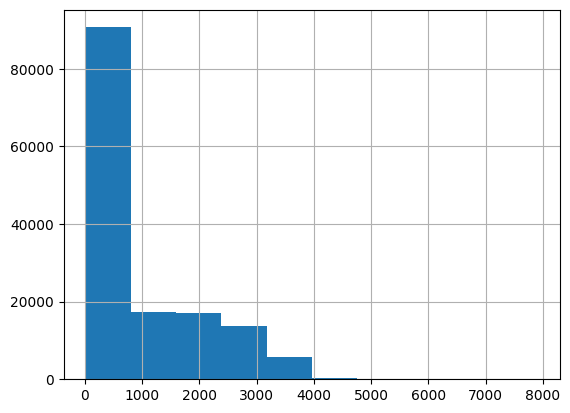

In [25]:
data['start_scan_to_end_scan'].hist() # This has outliers

<AxesSubplot: ylabel='start_scan_to_end_scan'>

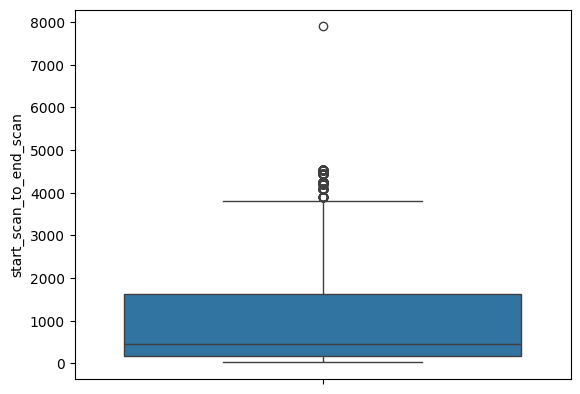

In [26]:
sns.boxplot(data['start_scan_to_end_scan'])

In [27]:
data[data['start_scan_to_end_scan']>5000]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip created date,trip created time,trip dur
123196,test,2018-10-01 23:35:54.432745,thanos::sroute:4316e05f-b4cc-4ea7-b801-62a93ae...,Carting,trip-153843695443252828,IND764071AAB,Pappadahandi_Central_DPP_2 (Orissa),IND530012AAA,Visakhapatnam_Gajuwaka_IP (Andhra Pradesh),2018-10-02 15:21:51.236205,...,211.0,293.3271,12.042654,2541.0,211.0,293.3271,12.042654,2018-10-01,23:35:54.432745,5 days 11:38:33.117274


In [28]:
data['is_cutoff'].value_counts()

is_cutoff
True     118749
False     26118
Name: count, dtype: int64

In [29]:
temp=data[['start_scan_to_end_scan', 'route_type','is_cutoff']]

<AxesSubplot: xlabel='is_cutoff', ylabel='start_scan_to_end_scan'>

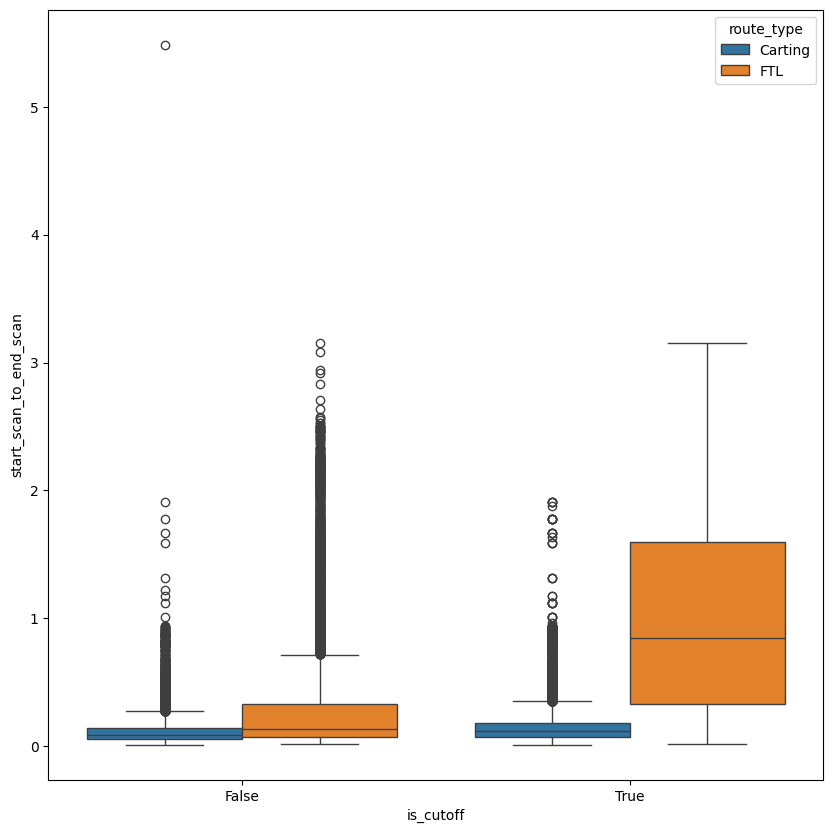

In [30]:
plt.figure(figsize=(10,10))
sns.boxplot(x=temp['is_cutoff'],y=temp['start_scan_to_end_scan']/(60*24), hue=temp['route_type'])
#For carting, we have fewer shipments, and they have many outliers
#For FTL, we have no outliers, and the average time is higher.

In [31]:
#so for the above graph, we see that the trip time is higher for FTL when the cutoff is met

<AxesSubplot: xlabel='is_cutoff', ylabel='actual_time'>

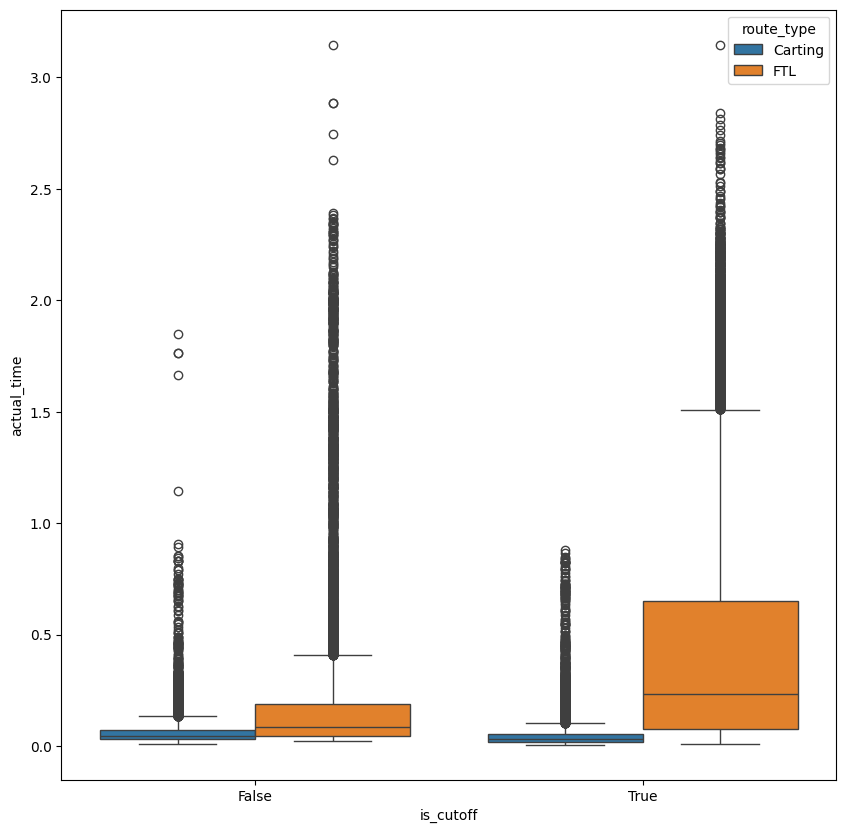

In [32]:
plt.figure(figsize=(10,10))
sns.boxplot(x=data['is_cutoff'], y=data['actual_time']/(60*24), hue=data['route_type'])

In [33]:
data['source_name'].head()

0    Anand_VUNagar_DC (Gujarat)
1    Anand_VUNagar_DC (Gujarat)
2    Anand_VUNagar_DC (Gujarat)
3    Anand_VUNagar_DC (Gujarat)
4    Anand_VUNagar_DC (Gujarat)
Name: source_name, dtype: object

In [34]:
data['source_state']=data['source_name'].str.split(' ', expand=True)[1].str.strip('()')
data['dest_state']=data['destination_name'].str.split(' ', expand=True)[1].str.strip('()')

In [35]:
data['source_state']

0         Gujarat
1         Gujarat
2         Gujarat
3         Gujarat
4         Gujarat
           ...   
144862    Haryana
144863    Haryana
144864    Haryana
144865    Haryana
144866    Haryana
Name: source_state, Length: 144867, dtype: object

In [36]:
data['dest_state']

0         Gujarat
1         Gujarat
2         Gujarat
3         Gujarat
4         Gujarat
           ...   
144862    Haryana
144863    Haryana
144864    Haryana
144865    Haryana
144866    Haryana
Name: dest_state, Length: 144867, dtype: object

In [37]:
data.groupby(['route_type','trip_uuid', 'source_state', 'dest_state'])['trip dur'].mean().sort_values(ascending=False)

route_type  trip_uuid                source_state  dest_state 
Carting     trip-153843695443252828  Orissa        Andhra        5 days 11:38:33.117274
FTL         trip-153724675612503042  Haryana       Tamil         3 days 03:35:42.913524
            trip-153858876340944305  Haryana       Karnataka     3 days 02:00:56.313994
            trip-153736469866480991  Haryana       West          2 days 22:39:27.270943
            trip-153840656812932039  West          Maharashtra   2 days 22:07:13.446025
                                                                          ...          
Carting     trip-153705136184290148  Karnataka     Karnataka     0 days 00:27:43.957153
            trip-153707928006502698  Punjab        Punjab        0 days 00:27:38.211640
            trip-153691633410647699  Haryana       Haryana       0 days 00:26:34.851090
            trip-153716585040807264  Punjab        Punjab        0 days 00:26:29.949865
            trip-153725231248161767  Punjab        Punjab

In [38]:
data.groupby(['route_type','trip_uuid','source_state','dest_state']).size().sort_values(ascending=False)

route_type  trip_uuid                source_state  dest_state 
FTL         trip-153755502932196495  Punjab        Karnataka      81
            trip-153681464570847135  Haryana       Tamil          79
            trip-153690920439662353  Haryana       Tamil          79
            trip-153751271053200074  Haryana       Tamil          79
            trip-153802876613714747  Haryana       Tamil          79
                                                                  ..
            trip-153759573136146899  Tamil         Tamil           1
Carting     trip-153841028998456842  Maharashtra   Maharashtra     1
FTL         trip-153802668135030159  Punjab        Himachal        1
            trip-153724843972967137  Punjab        Himachal        1
Carting     trip-153694723383461889  Kerala        Kerala          1
Length: 16813, dtype: int64

In [39]:
data['Trip creation to start days']=data['od_start_time']-data['trip_creation_time']

In [40]:
data.groupby('route_type')['Trip creation to start days'].mean()

route_type
Carting   0 days 01:37:09.676996733
FTL       0 days 05:46:01.935928739
Name: Trip creation to start days, dtype: timedelta64[ns]

In [41]:
data['source_to_dest_hours']=data['start_scan_to_end_scan']/60


In [42]:
data['speed_of_delivery']=data['actual_distance_to_destination']/(data['source_to_dest_hours'])

In [43]:
data.groupby(['source_name','destination_name'])['actual_distance_to_destination'].mean()

source_name                      destination_name                        
AMD_Memnagar (Gujarat)           Ahmedabad_East_H_1 (Gujarat)                13.166738
AMD_Rakhial (Gujarat)            Ahmedabad_East_H_1 (Gujarat)                11.704146
Abohar_DC (Punjab)               Malout_DC (Punjab)                          22.113336
                                 Muktsar_DPC (Punjab)                        37.613637
Achrol_BgwriDPP_D (Rajasthan)    Jaipur_Hub (Rajasthan)                      31.059072
                                                                               ...    
Weir_BsstdDPP_D (Rajasthan)      Kherli_GodamDPP_D (Rajasthan)               23.179788
YamunaNagar_DC (Haryana)         PaontSahib_Gurudwar_D (Himachal Pradesh)    37.396895
Yellandu_Sudimala_D (Telangana)  Rayaparthi_Perkadrd_D (Telangana)           53.399876
Yellareddy_JKRoad_D (Telangana)  Medak_Dwaraka_D (Telangana)                 27.062360
Zahirabad_Mohim_D (Telangana)    Hyderabad_Shamshbd_H (T

In [44]:
data.groupby(['route_type','source_name','destination_name'])['actual_time'].mean().sort_values(ascending=False)

route_type  source_name                       destination_name                   
FTL         Delhi_Airport_H (Delhi)           Guwahati_Hub (Assam)                   1861.867647
            Chandigarh_Mehmdpur_H (Punjab)    Bangalore_Nelmngla_H (Karnataka)       1682.728395
            Guwahati_Hub (Assam)              Delhi_Airport_H (Delhi)                1661.665787
            Bangalore_Nelmngla_H (Karnataka)  Kolkata_Dankuni_HB (West Bengal)       1549.171296
            Kolkata_Dankuni_HB (West Bengal)  Bhiwandi_Mankoli_HB (Maharashtra)      1531.104278
                                                                                        ...     
Carting     Vapi_IndEstat_I (Gujarat)         Bhilad_Umargaon_DC (Gujarat)             15.000000
            Bhubaneshwar_Nayapalli (Orissa)   Khurdha_JatniDPP_D (Orissa)              15.000000
                                              Bhubaneshwar_Hub (Orissa)                14.833333
            Khurdha_JatniDPP_D (Orissa)      

In [45]:
data.groupby(['route_type','source_name','destination_name'])['start_scan_to_end_scan'].mean().sort_values(ascending=False)

route_type  source_name                       destination_name                 
FTL         Chandigarh_Mehmdpur_H (Punjab)    Bangalore_Nelmngla_H (Karnataka)     3802.000000
            Delhi_Airport_H (Delhi)           Guwahati_Hub (Assam)                 3702.000000
            Kolkata_Dankuni_HB (West Bengal)  Bhiwandi_Mankoli_HB (Maharashtra)    3630.310160
            Bangalore_Nelmngla_H (Karnataka)  Kolkata_Dankuni_HB (West Bengal)     3595.000000
            Guwahati_Hub (Assam)              Delhi_Airport_H (Delhi)              3573.291117
                                                                                      ...     
Carting     Khurdha_MunplDPP_D (Orissa)       Khurdha_JatniDPP_D (Orissa)            30.000000
            Chennai_Vandalur_Dc (Tamil Nadu)  Chennai_Chrompet_DPC (Tamil Nadu)      28.000000
            Ludhiana_DC (Punjab)              Ludhiana_MilrGanj_HB (Punjab)          23.000000
            Khurdha_JatniDPP_D (Orissa)       Khurdha_MdhsnDPP_D 

In [46]:
#We see above that the actual time is very less while the start scan to end scan time is more between the same set of origin-destination points
#So that means we can take something like "admin time" which is the time spent on things other than the actual delivery

In [47]:
data['trip_admin_time']=data['start_scan_to_end_scan']-data['actual_time']

In [48]:
data.groupby(['route_type','source_name','destination_name'])['trip_admin_time'].mean().sort_values(ascending=False)

route_type  source_name                          destination_name                       
Carting     Gonda_KotwaliN_D (Uttar Pradesh)     Tulsipur_Central_DPP_1 (Uttar Pradesh)     2128.285714
FTL         Chandigarh_Mehmdpur_H (Punjab)       Bangalore_Nelmngla_H (Karnataka)           2119.271605
            Kolkata_Dankuni_HB (West Bengal)     Bhiwandi_Mankoli_HB (Maharashtra)          2099.205882
            Bangalore_Nelmngla_H (Karnataka)     Kolkata_Dankuni_HB (West Bengal)           2045.828704
            Kurnool_AbbasNgr_I (Andhra Pradesh)  Betamcherla_CmtNgRod_D (Andhra Pradesh)    2041.500000
                                                                                               ...     
            Uchila_Busstand_D (Karnataka)        Udupi (Karnataka)                             1.000000
Carting     Bengaluru_South_D_20 (Karnataka)     Bengaluru_Sarjapur_D (Karnataka)              1.000000
FTL         Daurala_Sardhnrd_D (Uttar Pradesh)   Khatauli_TilakNgr_D (Uttar Pra

In [49]:
data['actual_delivery_hours']=data['actual_time']/60

In [50]:
data['trip_admin_time_hours']=data['trip_admin_time']/60

In [51]:
data.groupby(['route_type', 'source_name','destination_name'])['actual_delivery_hours'].mean().sort_values(ascending=False)

route_type  source_name                       destination_name                   
FTL         Delhi_Airport_H (Delhi)           Guwahati_Hub (Assam)                   31.031127
            Chandigarh_Mehmdpur_H (Punjab)    Bangalore_Nelmngla_H (Karnataka)       28.045473
            Guwahati_Hub (Assam)              Delhi_Airport_H (Delhi)                27.694430
            Bangalore_Nelmngla_H (Karnataka)  Kolkata_Dankuni_HB (West Bengal)       25.819522
            Kolkata_Dankuni_HB (West Bengal)  Bhiwandi_Mankoli_HB (Maharashtra)      25.518405
                                                                                       ...    
Carting     Vapi_IndEstat_I (Gujarat)         Bhilad_Umargaon_DC (Gujarat)            0.250000
            Bhubaneshwar_Nayapalli (Orissa)   Khurdha_JatniDPP_D (Orissa)             0.250000
                                              Bhubaneshwar_Hub (Orissa)               0.247222
            Khurdha_JatniDPP_D (Orissa)       Khurdha_MdhsnDPP_

In [52]:
data.groupby(['route_type','source_name','destination_name'])['source_to_dest_hours'].mean().sort_values(ascending=False)

route_type  source_name                       destination_name                 
FTL         Chandigarh_Mehmdpur_H (Punjab)    Bangalore_Nelmngla_H (Karnataka)     63.366667
            Delhi_Airport_H (Delhi)           Guwahati_Hub (Assam)                 61.700000
            Kolkata_Dankuni_HB (West Bengal)  Bhiwandi_Mankoli_HB (Maharashtra)    60.505169
            Bangalore_Nelmngla_H (Karnataka)  Kolkata_Dankuni_HB (West Bengal)     59.916667
            Guwahati_Hub (Assam)              Delhi_Airport_H (Delhi)              59.554852
                                                                                     ...    
Carting     Khurdha_MunplDPP_D (Orissa)       Khurdha_JatniDPP_D (Orissa)           0.500000
            Chennai_Vandalur_Dc (Tamil Nadu)  Chennai_Chrompet_DPC (Tamil Nadu)     0.466667
            Ludhiana_DC (Punjab)              Ludhiana_MilrGanj_HB (Punjab)         0.383333
            Khurdha_JatniDPP_D (Orissa)       Khurdha_MdhsnDPP_D (Orissa)          

In [53]:
data['percentage_admin_hours_per_trip']=data['trip_admin_time_hours']/data['source_to_dest_hours']

In [54]:
data.groupby(['route_type','source_name','destination_name'])['percentage_admin_hours_per_trip'].mean().sort_values(ascending=False)

route_type  source_name                           destination_name                     
Carting     Allahabad_Mirapati_L (Uttar Pradesh)  Allahabad_Central_H_1 (Uttar Pradesh)    0.975733
            Delhi_Rohini_DPC (Delhi)              North Delhi (Delhi)                      0.962810
            Goa_Margao_Dc (Goa)                   Goa_ZuariNgr_IP (Goa)                    0.947505
            Bhubaneswar_Patia (Orissa)            Bhubaneshwar_Hub (Orissa)                0.944251
            Chennai_AshokNagar_DC (Tamil Nadu)    Chennai_Porur_DPC (Tamil Nadu)           0.944041
                                                                                             ...   
FTL         Bhilwara_DC (Rajasthan)               Rajsamand_kankroli_D (Rajasthan)         0.014576
            Sakri_DhuleRoad_D (Maharashtra)       Dhule_MIDCAvdn_I (Maharashtra)           0.014051
            Khatra_KoralDPP_D (West Bengal)       Hura_Central_D_1 (West Bengal)           0.011976
            

In [55]:
#Taking for different route types


In [56]:
data[data['route_type']=='FTL'].groupby(['source_name','destination_name'])['percentage_admin_hours_per_trip'].mean().sort_values(ascending=False)

source_name                         destination_name                   
Kodad_VidyaNgr_D (Telangana)        Khammam_NSTRoad_I (Telangana)          0.940419
Balasore_Ganeshwr_D (Orissa)        Udala_NagplDPP_D (Orissa)              0.933333
                                    Betnoti_MhliaDPP_D (Orissa)            0.930598
Haldwani_PiliKoti_D (Uttarakhand)   Rudrapur_UdhamNgr_H (Uttarakhand)      0.926689
Berhampur_Khajuria_I (Orissa)       Berhampur_Chatrpr_DC (Orissa)          0.914216
                                                                             ...   
Daurala_Sardhnrd_D (Uttar Pradesh)  Khatauli_TilakNgr_D (Uttar Pradesh)    0.019608
Bhilwara_DC (Rajasthan)             Rajsamand_kankroli_D (Rajasthan)       0.014576
Sakri_DhuleRoad_D (Maharashtra)     Dhule_MIDCAvdn_I (Maharashtra)         0.014051
Khatra_KoralDPP_D (West Bengal)     Hura_Central_D_1 (West Bengal)         0.011976
Shahada_Nandrbar_D (Maharashtra)    Dhule_MIDCAvdn_I (Maharashtra)         0.006667
Name

In [57]:
data[data['route_type']=='Carting'].groupby(['source_name','destination_name'])['percentage_admin_hours_per_trip'].mean().sort_values(ascending=False)

source_name                           destination_name                     
Allahabad_Mirapati_L (Uttar Pradesh)  Allahabad_Central_H_1 (Uttar Pradesh)    0.975733
Delhi_Rohini_DPC (Delhi)              North Delhi (Delhi)                      0.962810
Goa_Margao_Dc (Goa)                   Goa_ZuariNgr_IP (Goa)                    0.947505
Bhubaneswar_Patia (Orissa)            Bhubaneshwar_Hub (Orissa)                0.944251
Chennai_AshokNagar_DC (Tamil Nadu)    Chennai_Porur_DPC (Tamil Nadu)           0.944041
                                                                                 ...   
Tiruchi_Samyaprm_D (Tamil Nadu)       Tiruchi_Manikndm_H (Tamil Nadu)          0.071856
Chennai_Hub (Tamil Nadu)              Chennai_Egmore_DPC (Tamil Nadu)          0.040000
Bengaluru_South_D_20 (Karnataka)      Bengaluru_Sarjapur_D (Karnataka)         0.032258
Pachora_PcrrdDPP_D (Maharashtra)      Dhule_MIDCAvdn_I (Maharashtra)           0.019417
Chennai_Potheri (Tamil Nadu)          Chenna

In [58]:
#Now checking if the distributions for the shortest time and the actual time are the same

In [59]:
osrm_time_mean_values=data.groupby(['source_name','destination_name'])['osrm_time'].mean()
actual_time_mean_values=data.groupby(['source_name','destination_name'])['actual_time'].mean()


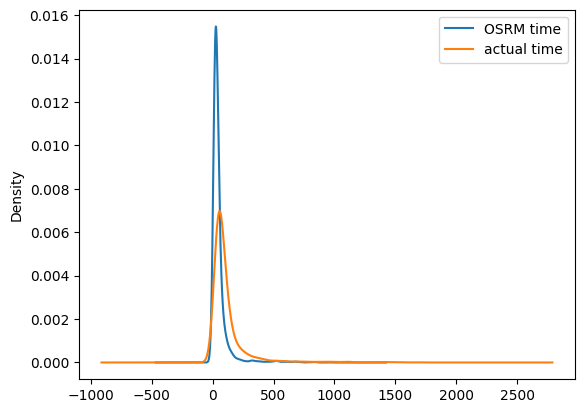

In [60]:
osrm_time_mean_values.plot(kind='kde')
actual_time_mean_values.plot(kind='kde')
plt.legend(['OSRM time','actual time'])

In [61]:
import scipy

In [62]:
#H0: There is no significant difference in the mean values of the actual delivery time and the shortest delivery time between a source-destination pair
#H1: The mean actual time is not the fastest time possible in most cases

In [63]:
scipy.stats.ttest_ind(osrm_time_mean_values,actual_time_mean_values)

Ttest_indResult(statistic=-18.217137160605176, pvalue=4.867518815723103e-72)

In [64]:
#Here the p value is very low, <0.05, so we reject the null hypothesis.
#The actual time is very high compared to the least theoritical time possible

In [65]:
#We can group by route_type as well and compare
actual_mean_time_ftl=data[data['route_type']=='FTL'].groupby(['source_name','destination_name'])['actual_time'].mean()
actual_mean_time_ftl

source_name                          destination_name                        
Abohar_DC (Punjab)                   Malout_DC (Punjab)                           19.000000
                                     Muktsar_DPC (Punjab)                         76.000000
Achrol_BgwriDPP_D (Rajasthan)        Jaipur_Hub (Rajasthan)                       61.000000
Addanki_Oilmilrd_D (Andhra Pradesh)  Ongole_SubhVRTL_I (Andhra Pradesh)          174.000000
Agra_Central_D_3 (Uttar Pradesh)     Kirauli_AchneraRD_D (Uttar Pradesh)          39.000000
                                                                                    ...    
Weir_BsstdDPP_D (Rajasthan)          Kherli_GodamDPP_D (Rajasthan)                59.125000
YamunaNagar_DC (Haryana)             PaontSahib_Gurudwar_D (Himachal Pradesh)     90.500000
Yellandu_Sudimala_D (Telangana)      Rayaparthi_Perkadrd_D (Telangana)           102.937500
Yellareddy_JKRoad_D (Telangana)      Medak_Dwaraka_D (Telangana)                  53.421053
Za

In [66]:
actual_mean_time_carting=data[data['route_type']=='Carting'].groupby(['source_name','destination_name'])['actual_time'].mean()
actual_mean_time_carting

source_name                                 destination_name                          
AMD_Memnagar (Gujarat)                      Ahmedabad_East_H_1 (Gujarat)                   30.437500
AMD_Rakhial (Gujarat)                       Ahmedabad_East_H_1 (Gujarat)                   43.603175
Adoor_Town_D (Kerala)                       Kollam_Central_H_1 (Kerala)                    93.594595
Agra_Central_D_3 (Uttar Pradesh)            Kirauli_AchneraRD_D (Uttar Pradesh)            33.363636
Agra_Idgah_P (Uttar Pradesh)                Delhi_Airport_H (Delhi)                       223.017544
                                                                                             ...    
Visakhapatnam_VislkNgr_DC (Andhra Pradesh)  Visakhapatnam_Gajuwaka_IP (Andhra Pradesh)     81.500000
Vizag _NAD (Andhra Pradesh)                 Vishakhapatnam (Andhra Pradesh)                35.000000
Vizag_Gajuwaka (Andhra Pradesh)             Chodavaram_BaljiDPP_D (Andhra Pradesh)         58.562500
Vizi

In [67]:
scipy.stats.ttest_ind(actual_mean_time_ftl, actual_mean_time_carting)

Ttest_indResult(statistic=13.020962305664122, pvalue=1.1671182142135224e-37)

In [68]:
#The mean time for full truck load is very different from the mean time for carting

In [69]:
#Doing the same for distance

In [70]:
mean_actual_distance=data.groupby(['source_name','destination_name'])['actual_distance_to_destination'].mean()
mean_actual_distance

source_name                      destination_name                        
AMD_Memnagar (Gujarat)           Ahmedabad_East_H_1 (Gujarat)                13.166738
AMD_Rakhial (Gujarat)            Ahmedabad_East_H_1 (Gujarat)                11.704146
Abohar_DC (Punjab)               Malout_DC (Punjab)                          22.113336
                                 Muktsar_DPC (Punjab)                        37.613637
Achrol_BgwriDPP_D (Rajasthan)    Jaipur_Hub (Rajasthan)                      31.059072
                                                                               ...    
Weir_BsstdDPP_D (Rajasthan)      Kherli_GodamDPP_D (Rajasthan)               23.179788
YamunaNagar_DC (Haryana)         PaontSahib_Gurudwar_D (Himachal Pradesh)    37.396895
Yellandu_Sudimala_D (Telangana)  Rayaparthi_Perkadrd_D (Telangana)           53.399876
Yellareddy_JKRoad_D (Telangana)  Medak_Dwaraka_D (Telangana)                 27.062360
Zahirabad_Mohim_D (Telangana)    Hyderabad_Shamshbd_H (T

In [71]:
mean_osrm_distance=data.groupby(['source_name','destination_name'])['osrm_distance'].mean()
mean_osrm_distance

source_name                      destination_name                        
AMD_Memnagar (Gujarat)           Ahmedabad_East_H_1 (Gujarat)                16.077121
AMD_Rakhial (Gujarat)            Ahmedabad_East_H_1 (Gujarat)                14.478446
Abohar_DC (Punjab)               Malout_DC (Punjab)                          22.495000
                                 Muktsar_DPC (Punjab)                        47.849033
Achrol_BgwriDPP_D (Rajasthan)    Jaipur_Hub (Rajasthan)                      38.684355
                                                                               ...    
Weir_BsstdDPP_D (Rajasthan)      Kherli_GodamDPP_D (Rajasthan)               37.716250
YamunaNagar_DC (Haryana)         PaontSahib_Gurudwar_D (Himachal Pradesh)    49.932611
Yellandu_Sudimala_D (Telangana)  Rayaparthi_Perkadrd_D (Telangana)           86.816981
Yellareddy_JKRoad_D (Telangana)  Medak_Dwaraka_D (Telangana)                 35.848268
Zahirabad_Mohim_D (Telangana)    Hyderabad_Shamshbd_H (T

In [72]:
scipy.stats.ttest_ind(mean_actual_distance, mean_osrm_distance)

Ttest_indResult(statistic=-4.8798879599600244, pvalue=1.0915251940909976e-06)

In [73]:
#Based on the result above, the mean of actual mean distances is signifiantly different from the mean of shortest_mean_differences

In [74]:
data.groupby(['is_cutoff','route_type'])['percentage_admin_hours_per_trip'].mean() #The % of admin hours in carting hours is more thann that of FTL
#So time spent of FTL is more efficient than carting

is_cutoff  route_type
False      Carting       0.441974
           FTL           0.303141
True       Carting       0.675897
           FTL           0.588018
Name: percentage_admin_hours_per_trip, dtype: float64

In [75]:
#Also clearly, if the cutoff is met, the amount of admin work is much more

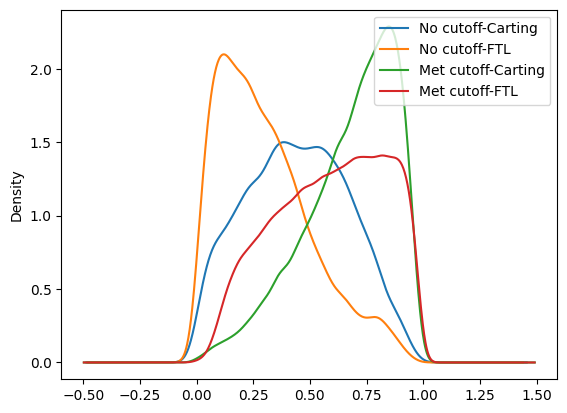

In [76]:
data.groupby(['is_cutoff','route_type'])['percentage_admin_hours_per_trip'].plot(kind='kde')
plt.legend(['No cutoff-Carting','No cutoff-FTL','Met cutoff-Carting','Met cutoff-FTL'])

In [77]:
scipy.stats.ttest_ind(data[data['route_type']=='carting']['percentage_admin_hours_per_trip'], data[data['route_type']=='FTL']['percentage_admin_hours_per_trip'], nan_policy='omit', random_state=10)

Ttest_indResult(statistic=nan, pvalue=nan)

In [78]:
#I checked and found that the test stat and p value come as null when the values of the two groups are nearly identical resulting in division by zero errors
#It means that the p value is very large, and hence we cannot reject the null hypothesis.
#Therefore the route type has does not influence the average percentage of admin time for a trip

In [79]:
data[['route_type','percentage_admin_hours_per_trip']].isnull().sum()

route_type                         0
percentage_admin_hours_per_trip    0
dtype: int64

In [80]:
data[data['route_type']=='Carting']['percentage_admin_hours_per_trip'].std()

0.2333985710648962

In [81]:
data[data['route_type']=='Carting']['percentage_admin_hours_per_trip'].mean()

0.6122253238609936

In [82]:
data[data['route_type']=='FTL']['percentage_admin_hours_per_trip'].std()

0.2542142711653844

In [83]:
data[data['route_type']=='FTL']['percentage_admin_hours_per_trip'].mean()

0.5485339638846207

In [84]:
data['route_schedule_uuid'].nunique()

1504

In [85]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'trip created date', 'trip created time', 'trip dur', 'source_state',
       'dest_state', 'Trip creation to start days', 'source_to_dest_hours',
       'speed_of_delivery', 'trip_admin_time', 'actual_delivery_hours',
       'trip_admin_time_hours', 'percentage_admin_hours_per_trip'],
      dtype='object')

In [86]:
new_data=data.drop(['data','source_name','destination_name','trip_uuid','route_schedule_uuid', 'source_center','destination_center','trip_creation_time','od_start_time','od_end_time','cutoff_timestamp','trip created date', 'trip created time','source_state','dest_state'], axis=1)

In [87]:
new_data.dtypes

route_type                                  object
start_scan_to_end_scan                     float64
is_cutoff                                     bool
cutoff_factor                                int64
actual_distance_to_destination             float64
actual_time                                float64
osrm_time                                  float64
osrm_distance                              float64
factor                                     float64
segment_actual_time                        float64
segment_osrm_time                          float64
segment_osrm_distance                      float64
segment_factor                             float64
trip dur                           timedelta64[ns]
Trip creation to start days        timedelta64[ns]
source_to_dest_hours                       float64
speed_of_delivery                          float64
trip_admin_time                            float64
actual_delivery_hours                      float64
trip_admin_time_hours          

In [88]:
data['route_type'].value_counts()

route_type
FTL        99660
Carting    45207
Name: count, dtype: int64

In [89]:
new_data['route_type'].replace({'FTL':0,'Carting':1}, inplace=True)

In [90]:
#new_data['cutoff_factor'].head()

In [91]:
#so my percentage admin hours per trip depends only on speed

In [92]:
pd.DataFrame(abs(new_data.corr())>0.5)['percentage_admin_hours_per_trip']

route_type                         False
start_scan_to_end_scan             False
is_cutoff                          False
cutoff_factor                      False
actual_distance_to_destination     False
actual_time                        False
osrm_time                          False
osrm_distance                      False
factor                             False
segment_actual_time                False
segment_osrm_time                  False
segment_osrm_distance              False
segment_factor                     False
trip dur                           False
Trip creation to start days        False
source_to_dest_hours               False
speed_of_delivery                   True
trip_admin_time                    False
actual_delivery_hours              False
trip_admin_time_hours              False
percentage_admin_hours_per_trip     True
Name: percentage_admin_hours_per_trip, dtype: bool

In [93]:
pd.DataFrame(abs(new_data.corr())>0.5)['speed_of_delivery']

route_type                         False
start_scan_to_end_scan             False
is_cutoff                          False
cutoff_factor                       True
actual_distance_to_destination      True
actual_time                        False
osrm_time                           True
osrm_distance                       True
factor                             False
segment_actual_time                False
segment_osrm_time                  False
segment_osrm_distance              False
segment_factor                     False
trip dur                           False
Trip creation to start days        False
source_to_dest_hours               False
speed_of_delivery                   True
trip_admin_time                    False
actual_delivery_hours              False
trip_admin_time_hours              False
percentage_admin_hours_per_trip     True
Name: speed_of_delivery, dtype: bool

<AxesSubplot: >

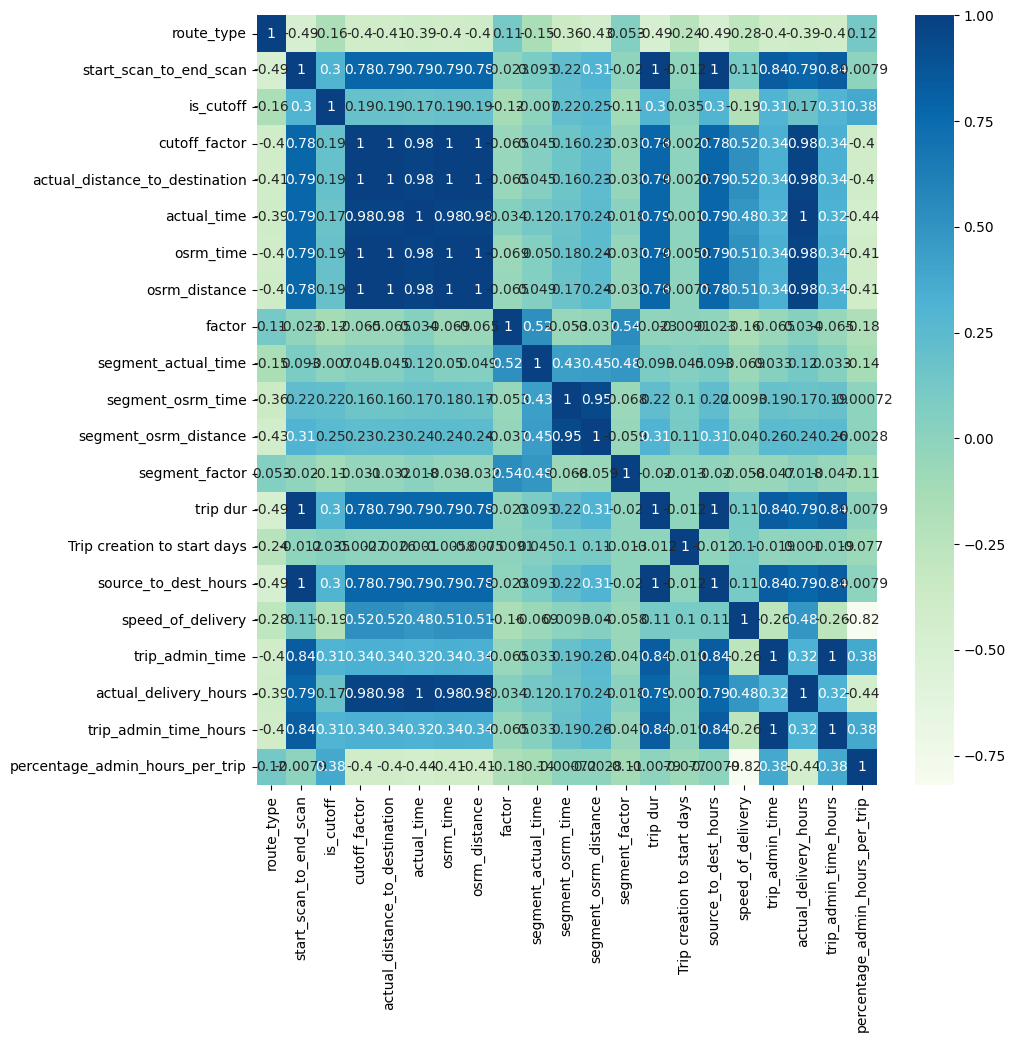

In [94]:
plt.figure(figsize=(10,10))
sns.heatmap(new_data.corr(), annot=True, cmap='GnBu')

In [95]:
data['same_state_delivery']=[1 if data.loc[i,'source_state']==data.loc[i,'dest_state'] else 0 for i in range(data.shape[0])]

In [96]:
data['same_state_delivery'].head(30)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
Name: same_state_delivery, dtype: int64

In [97]:
data.groupby('same_state_delivery')['percentage_admin_hours_per_trip'].mean()

same_state_delivery
0    0.571204
1    0.565508
Name: percentage_admin_hours_per_trip, dtype: float64

In [98]:
#So even though the source and destination states are the same, the admin work is still high, and the difference of 1% point may well be chance.
#This means that the admin work does not depend on any of the external factors, so it should be possible to reduce the admin time by putting process improvement measures across the board at a fundamental level

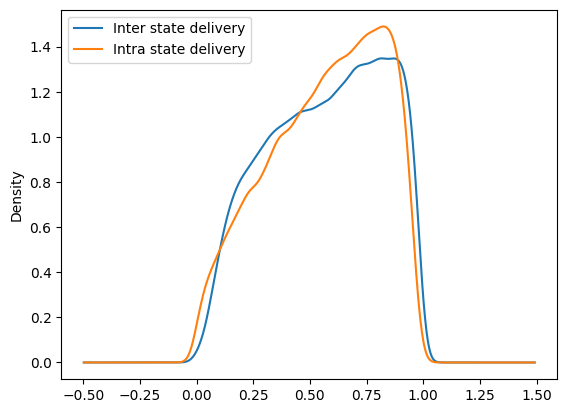

In [99]:
data.groupby('same_state_delivery')['percentage_admin_hours_per_trip'].plot(kind='kde')
plt.legend(['Inter state delivery','Intra state delivery'])
plt.show()

In [100]:
#This shows that most of the deliveries have 75% of the time as administrative time, so the actual delivery can improve drastically.
#Therefore delhivery can benefit from implementing a six sigma program aimed at reducing the mean time to delivery across the board by improving efficiency.

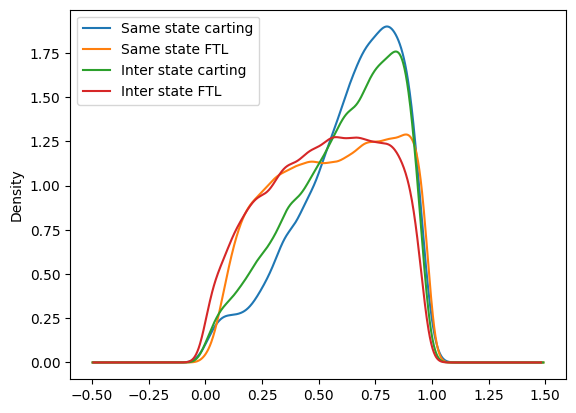

In [101]:
data.groupby(['same_state_delivery','route_type'])['percentage_admin_hours_per_trip'].plot(kind='kde')
plt.legend(['Same state carting','Same state FTL','Inter state carting','Inter state FTL'])

In [102]:
data.groupby(['same_state_delivery','route_type'])['percentage_admin_hours_per_trip'].mean()

same_state_delivery  route_type
0                    Carting       0.635963
                     FTL           0.561689
1                    Carting       0.605949
                     FTL           0.524570
Name: percentage_admin_hours_per_trip, dtype: float64

In [103]:
data.groupby(['is_cutoff','route_type'])['percentage_admin_hours_per_trip'].mean()

is_cutoff  route_type
False      Carting       0.441974
           FTL           0.303141
True       Carting       0.675897
           FTL           0.588018
Name: percentage_admin_hours_per_trip, dtype: float64

In [104]:
scipy.stats.ttest_ind(data[data['is_cutoff']==0]['percentage_admin_hours_per_trip'], data[data['is_cutoff']==1]['percentage_admin_hours_per_trip'], alternative='less')

Ttest_indResult(statistic=-154.17501726454833, pvalue=0.0)

In [105]:
#So the goal of delhivery is to make more delivery times make the cutoff

In [106]:
data.groupby(['is_cutoff'])['cutoff_factor'].mean()

is_cutoff
False     92.655793
True     263.778129
Name: cutoff_factor, dtype: float64

In [107]:
data['is_cutoff'].value_counts()/len(data)

is_cutoff
True     0.81971
False    0.18029
Name: count, dtype: float64

In [108]:
scipy.stats.ttest_ind(data[data['same_state_delivery']==1]['percentage_admin_hours_per_trip'], data[data['same_state_delivery']==0]['percentage_admin_hours_per_trip'], alternative='less')

Ttest_indResult(statistic=-4.341552684068258, pvalue=7.078757436318157e-06)

In [109]:
#Therefore, within the same state, the admin time spent is less

In [110]:
data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'trip created date', 'trip created time', 'trip dur', 'source_state',
       'dest_state', 'Trip creation to start days', 'source_to_dest_hours',
       'speed_of_delivery', 'trip_admin_time', 'actual_delivery_hours',
       'trip_admin_time_hours', 'percentage_admin_hours_per_trip',
       'same_state_delivery'],
      dtype='object')

In [134]:
df_temp=data.groupby(['source_state', 'dest_state'])[['osrm_time','start_scan_to_end_scan','percentage_admin_hours_per_trip','segment_orm_distance']].mean().reset_index()

KeyError: "Columns not found: 'segment_orm_distance'"

In [135]:
df_temp['act_to_shortest_ratio']=df_temp['start_scan_to_end_scan']/df_temp['osrm_time']

In [122]:
df_temp.sort_values(by='act_to_shortest_ratio', ascending=False)

,source_state,dest_state,osrm_time,start_scan_to_end_scan,percentage_admin_hours_per_trip,act_to_shortest_ratio
195,_NAD,Andhra,8.000000,231.000000,0.848485,28.875000
134,Nagaland,Assam,43.000000,885.525000,0.679062,20.593605
132,Mizoram,Assam,52.750000,997.000000,0.857573,18.900474
111,Maharashtra,Antop,12.000000,187.000000,0.423671,15.583333
86,Karnataka,Kothanur_L,29.500000,422.000000,0.756517,14.305085
...,...,...,...,...,...,...
155,Rajasthan,Madhya,40.472727,109.400000,0.436769,2.703055
181,Uttar,Uttarakhand,80.966667,217.133333,0.448148,2.681762
161,Tamil,Kerala,80.562500,211.062500,0.314940,2.619860
179,Uttar,Rajasthan,38.304348,80.478261,0.435072,2.101022


In [125]:
df_temp[['percentage_admin_hours_per_trip', 'act_to_shortest_ratio']].corr()

,percentage_admin_hours_per_trip,act_to_shortest_ratio
percentage_admin_hours_per_trip,1.00000,0.44857
act_to_shortest_ratio,0.44857,1.00000


In [131]:
df_temp2=data.groupby(['source_state','dest_state'])[['actual_distance_to_destination','segment_osrm_distance']].mean().reset_index()

In [132]:
df_temp2['act_to_shortest_dist_ratio']=df_temp2['actual_distance_to_destination']/df_temp2['segment_osrm_distance']

In [133]:
df_temp2.sort_values(by='act_to_shortest_dist_ratio', ascending=False)

,source_state,dest_state,actual_distance_to_destination,segment_osrm_distance,act_to_shortest_dist_ratio
148,Punjab,Karnataka,1050.751668,30.866846,34.041433
94,Karnataka,West,804.067604,27.389944,29.356307
83,Karnataka,Haryana,869.096298,30.660306,28.345976
58,Haryana,Karnataka,859.827666,30.352581,28.327992
64,Haryana,Tamil,876.628008,32.573176,26.912574
...,...,...,...,...,...
178,Uttar,Nagar,11.915509,13.579453,0.877466
69,Himachal,Haryana,22.392697,29.195150,0.767001
195,_NAD,Andhra,9.228686,12.213500,0.755614
111,Maharashtra,Antop,9.456285,13.961950,0.677290
